In [2]:
#Сірська Марія, Шергіна Олександра
# Завдання: Написання алгоритмів Белмана-Форда та Флойда-Воршала, дослідження їх роботи і порівняння 
# нашої реалізації з вбудованими, порівняння алгоритмів між собою 

In [3]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby
from datetime import datetime
from time import time

In [4]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
        #print(w['weight'])
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

In [5]:
from networkx.algorithms import bellman_ford_predecessor_and_distance

In [6]:
def bellman_ford_algorithm(graph, start_node):
    """
    returns shortest distance to each node in a graph from starting point.
    """
    shortest_distances ={i: float('inf') for i in graph.nodes}
    shortest_distances[start_node] = 0
    for length in range(1, len(graph.nodes)):
        for edge in graph.edges:
            shortest_distances[edge[1]] = min(shortest_distances[edge[0]] + graph.edges[edge]['weight'], shortest_distances[edge[1]])
    
    for edge in graph.edges:
            if shortest_distances[edge[0]] != float("inf") and shortest_distances[edge[0]] +  graph.edges[edge]['weight']  < shortest_distances[edge[1]]:
                return "Negative cycle detected"
    return shortest_distances

100%|██████████| 3/3 [02:13<00:00, 44.35s/it]


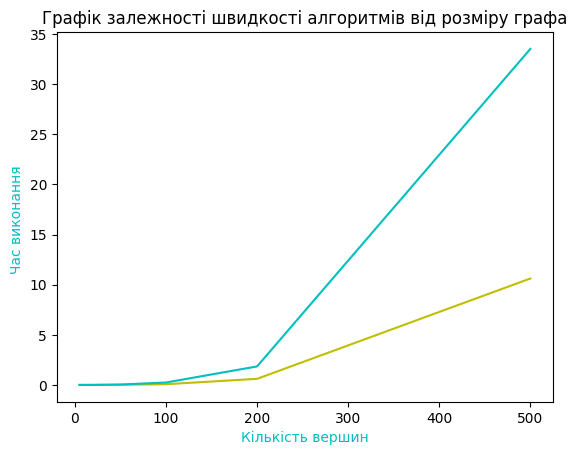

In [7]:

import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

NUM_OF_ITERATIONS = 10
nodes = [5,10,20,50,100,200, 500]
losses = []
losses2 = []
for t in nodes:
    time_taken = 0
    time_taken2 = 0
    if t >= 100:
        NUM_OF_ITERATIONS = 5
    if t == 500:
        NUM_OF_ITERATIONS = 3
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        G = gnp_random_connected_graph(t, 0.5, False)
        start = time.time()
        try:
            bellman_ford_predecessor_and_distance(G, 0)
        except:
            pass
        end = time.time()
        time_taken += (end - start)

        start2 = time.time()
        try:
            bellman_ford_algorithm(G, 0)
        except:
            pass
        end2 = time.time()
        time_taken2 += (end2 - start2)

    losses.append(time_taken/NUM_OF_ITERATIONS)
    losses2.append(time_taken2/NUM_OF_ITERATIONS)



Y = np.array([i for i in losses])
X = np.array([i for i in nodes])
#B = np.array([i for i in range(1, NUM_OF_ITERATIONS+1, 10)])
A = np.array([i for i in losses2])
plt.title("Графік залежності швидкості алгоритмів від розміру графа")                                                                                                                                                                                        
plt.xlabel('Кількість вершин', c = 'c')
plt.ylabel('Час виконання ', c = 'c')
plt.plot(X, Y, c = 'y') # жовтий - вбудований
plt.plot(X, A, c= 'c') # синій - наш
plt.show()


In [8]:
# На графіку зображено, що при невеликій кількості вершин швидкість 
#нашого та вбудованого алгоритму схожа, при великій, швидкість вбудованого трохи більша

In [9]:
#20 вершин
import time
from tqdm import tqdm
G = gnp_random_connected_graph(20, 0.5, True, False)
start = time.time()
print(bellman_ford_algorithm(G, 0))
end = time.time()
time_taken = end - start
print(time_taken)


start = time.time()
try:
    print(bellman_ford_predecessor_and_distance(G, 0))
except:
    print('Negative cycle detected')
end = time.time()    
time_taken = end - start
print('вбудований: ',time_taken)

#мінімальний час для нашого алгоритму для графа з 20 вершинами, ймовірністю 0.5 : 0.0007

{0: 0, 1: 24, 2: 21, 3: 23, 4: 16, 5: 4, 6: 5, 7: 16, 8: 1, 9: 5, 10: 19, 11: 9, 12: 1, 13: 1, 14: -1, 15: 1, 16: -5, 17: -1, 18: -1, 19: -2}
0.0019953250885009766
({0: [], 14: [12], 4: [0], 5: [0], 8: [0], 9: [0], 11: [0], 12: [9], 13: [18], 15: [13], 16: [0], 19: [13], 17: [14], 10: [4], 18: [5], 1: [5], 7: [8], 6: [17], 2: [1], 3: [1]}, {0: 0, 14: -1, 4: 16, 5: 4, 8: 1, 9: 5, 11: 9, 12: 1, 13: 1, 15: 1, 16: -5, 19: -2, 17: -1, 10: 19, 18: -1, 1: 24, 7: 16, 6: 5, 2: 21, 3: 23})
вбудований:  0.0009999275207519531


In [10]:
#50 вершин
import time
from tqdm import tqdm
G = gnp_random_connected_graph(50, 0.5, True, False)
start = time.time()
print(bellman_ford_algorithm(G, 0))
end = time.time()
time_taken = end - start
print(time_taken)


start = time.time()
try:
    print(bellman_ford_predecessor_and_distance(G, 0))
except:
    print('Negative cycle detected')
end = time.time()    
time_taken = end - start
print('вбудований: ',time_taken)

#мінімальний час для нашого алгоритму для графа з 50 вершинами, ймовірністю 0.5 : 0.019 

Negative cycle detected
0.02851271629333496
Negative cycle detected
вбудований:  0.00840449333190918


In [11]:
#100 вершин
import time
from tqdm import tqdm
G = gnp_random_connected_graph(100, 0.5, True, False)
start = time.time()
print(bellman_ford_algorithm(G, 0))
end = time.time()
time_taken = end - start
print(time_taken)


start = time.time()
try:
    print(bellman_ford_predecessor_and_distance(G, 0))
except:
    print('Negative cycle detected')
end = time.time()    
time_taken = end - start
print('вбудований: ',time_taken)

#мінімальний час для нашого алгоритму для графа з 100 вершинами, ймовірністю 0.5 : 0.11

Negative cycle detected
0.3740065097808838
Negative cycle detected
вбудований:  0.06555628776550293


In [12]:
#200 вершин
G = gnp_random_connected_graph(200, 0.5, True, False)
start = time.time()
bellman_ford_algorithm(G, 0)
end = time.time()
time_taken = end - start
print(time_taken)


start = time.time()
try:
    bellman_ford_predecessor_and_distance(G, 0)
except:
    print('Negative cycle detected')
end = time.time()    
time_taken = end - start
print('вбудований: ',time_taken)


#мінімальний час для нашого алгоритму для графа з 200 вершинами, ймовірністю 0.5 :  1.07

1.6681931018829346
Negative cycle detected
вбудований:  0.4026923179626465


In [13]:
#200 вершин
G = gnp_random_connected_graph(200, 0.005, True, False)
start = time.time()
bellman_ford_algorithm(G, 0)
end = time.time()
time_taken = end - start
print(time_taken)


start = time.time()
try:
    bellman_ford_predecessor_and_distance(G, 0)
except:
    print('Negative cycle detected')
end = time.time()    
time_taken = end - start
print('вбудований: ',time_taken)

#мінімальний час для нашого алгоритму для графа з 200 вершинами, ймовірністю 0.005 :  0.02

0.06256866455078125
вбудований:  0.0


In [14]:
from networkx.algorithms import floyd_warshall_predecessor_and_distance

In [15]:
def floyd_warshall(graph):
    length = len(graph.nodes)
    lst = [[0 for _ in range(length) ] for _  in range(length)]
   # another = [[i for _ in range(length) ] for i  in range(length)]
    for i in range(length):
        for m in range(length):
            if i == m:
                lst[i][m] = 0
            elif (i,m) in graph.edges:
                lst[i][m] = graph[i][m]['weight']
            else:
                lst[i][m] = float('inf')

    distances = [line for line in lst]
    for n in range(length):
        for i in range(length):
            for m in range(length):
                if distances[i][n] + distances[n][m] < distances[i][m]:
                    #another[i][m] = n
                    distances[i][m] =  distances[i][n] + distances[n][m]
    return {ind:{ index:k for index, k in enumerate(i)} for ind, i in enumerate(distances)}
    

In [16]:

import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

NUM_OF_ITERATIONS = 10
nodes = [5,10,20,50,100,200, 500]
losses = []
losses2 = []
time_taken = 0
time_taken2 = 0
for t in nodes:
    if t >= 100:
        NUM_OF_ITERATIONS = 5
    if t == 500:
        NUM_OF_ITERATIONS = 3
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        G = gnp_random_connected_graph(t, 0.5, False)
        start = time.time()
        try:
            floyd_warshall_predecessor_and_distance(G)
        except:
            pass
        end = time.time()
        time_taken += (end - start)

        start2 = time.time()
        try:
            floyd_warshall(G)
        except:
            pass
        end2 = time.time()
        time_taken2 += (end2 - start2)

    losses.append(time_taken/NUM_OF_ITERATIONS)
    losses2.append(time_taken2/NUM_OF_ITERATIONS)



Y = np.array([i for i in losses])
X = np.array([i for i in nodes])
#B = np.array([i for i in range(1, NUM_OF_ITERATIONS+1, 10)])
A = np.array([i for i in losses2])
plt.title("Графік залежності швидкості алгоритмів від розміру графа")                                                                                                                                                                                        
plt.xlabel('Кількість вершин', c = 'c')
plt.ylabel('Час виконання ', c = 'c')
plt.plot(X, Y, c = 'y') # жовтий - вбудований
plt.plot(X, A, c= 'c') # синій - наш
plt.show()


 33%|███▎      | 1/3 [01:49<03:38, 109.29s/it]

In [ ]:
# Як бачимо по графіку: різниця між швидкістю нашого та вбудованого алгоримому невелика

In [ ]:
#10 вершин
import time
G = gnp_random_connected_graph(3, 1, True, False)
start = time.time()
floyd_warshall(G)
end = time.time()
    
time_taken = end - start
print(time_taken)

start = time.time()
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G) 
except:
    print('Negative cycle detected')
end = time.time()    
time_taken = end - start
print('вбудований: ',time_taken)
#мінімальний час для нашого алгоритму для графа з 10 вершинами, ймовірністю 0.5 : 0.0

0.0
вбудований:  0.0


In [ ]:
#50 вершин
import time
G = gnp_random_connected_graph(50, 0.5, True, False)
start = time.time()
floyd_warshall(G)
end = time.time()
    
time_taken = end - start
print(time_taken)

start = time.time()
try:
    floyd_warshall_predecessor_and_distance(G)
except:
    print('Negative cycle detected')
end = time.time()    
time_taken = end - start
print('вбудований: ',time_taken)
#мінімальний час для нашого алгоритму для графа з 50 вершинами, ймовірністю 0.5 :  0.012

0.027816057205200195
вбудований:  0.018230915069580078


In [ ]:
#100 вершин
import time
G = gnp_random_connected_graph(100, 0.5, True, False)
start = time.time()
floyd_warshall(G)
end = time.time()
    
time_taken = end - start
print(time_taken)

start = time.time()
try:
    floyd_warshall_predecessor_and_distance(G)
except:
    print('Negative cycle detected')
end = time.time()    
time_taken = end - start
print('вбудований: ',time_taken)
#мінімальний час для нашого алгоритму для графа з 100 вершинами, ймовірністю 0.5 :  0.12

0.13686680793762207
вбудований:  0.16150474548339844


In [ ]:
#200 вершин
import time
G = gnp_random_connected_graph(200, 0.5, True, False)
start = time.time()
floyd_warshall(G)
end = time.time()
    
time_taken = end - start
print(time_taken)

start = time.time()
try:
    floyd_warshall_predecessor_and_distance(G)
except:
    print('Negative cycle detected')
end = time.time()    
time_taken = end - start
print('вбудований: ',time_taken)
#мінімальний час для нашого алгоритму для графа з 200 вершинами, ймовірністю 0.5 :  1.09

1.1572990417480469
вбудований:  1.4312551021575928


In [ ]:
#20 вершин, ймовірнiсть 0.01
import time
G = gnp_random_connected_graph(20, 0.01, True, False)
start = time.time()
floyd_warshall(G)
end = time.time()
    
time_taken = end - start
print(time_taken)

start = time.time()
try:
    floyd_warshall_predecessor_and_distance(G)
except:
    print('Negative cycle detected')
end = time.time()    
time_taken = end - start
print('вбудований: ',time_taken)
#мінімальний час для нашого алгоритму для графа з 20 вершинами, ймовірністю 0.01 :  0.001

0.0020635128021240234
вбудований:  0.0011601448059082031


In [ ]:
#Як бачимо ефективність нашого алгоритму і вбудованого алгоритму для реалізації алгоритму 
# Флойда-Воршала не сильно відрязняється, зазвичай наш алгоритм працює трішки швидше

In [ ]:
#20 вершин, ймовірнiсть 0.1, порівняння Белмана-Форда і Флойда-Воршала
import time
G = gnp_random_connected_graph(20, 0.1, True, False)
start = time.time()
floyd_warshall(G)
end = time.time()
    
time_taken = end - start
print('Флойда-Воршала', time_taken)

start = time.time()
try:
    for i in G.nodes:
        bellman_ford_algorithm(G,i)
except:
    print('Negative cycle detected')
end = time.time()    
time_taken = end - start
print('Белмана-Форда: ',time_taken)
#мінімальний час для алгоритму для Флойда-Воршала для графа з 200 вершинами, ймовірністю 0.1 :  0.001,  Белмана-Форда  - 0.008

Флойда-Воршала 0.0024137496948242188
Белмана-Форда:  0.010280609130859375


In [ ]:
#100 вершин, ймовірнiсть 0.5, порівняння Белмана-Форда і Флойда-Воршала
import time
G = gnp_random_connected_graph(100, 0.5, True, False)
start = time.time()
floyd_warshall(G)
end = time.time()
    
time_taken = end - start
print('Флойда-Воршала', time_taken)

start = time.time()
try:
    for i in G.nodes:
        bellman_ford_algorithm(G,i)
except:
    print('Negative cycle detected')
end = time.time()    
time_taken = end - start
print('Белмана-Форда: ',time_taken)

#мінімальний час для алгоритму для Флойда-Воршала для графа з 100 вершинами, ймовірністю 0.5 :  0.12,  Белмана-Форда  - 11.1

Флойда-Воршала 0.14099764823913574
Белмана-Форда:  13.337177991867065


In [ ]:
#50 вершин, ймовірнiсть 0.5, порівняння Белмана-Форда і Флойда-Воршала
import time
G = gnp_random_connected_graph(50, 0.5, True, False)
start = time.time()
floyd_warshall(G)
end = time.time()
    
time_taken = end - start
print('Флойда-Воршала', time_taken)

start = time.time()
try:
    for i in G.nodes:
        bellman_ford_algorithm(G,i)
except:
    print('Negative cycle detected')
end = time.time()    
time_taken = end - start
print('Белмана-Форда: ',time_taken)
#мінімальний час для алгоритму для Флойда-Воршала для графа з 50 вершинами, ймовірністю 0.5 :  0.001,  Белмана-Форда  - 0.4

Флойда-Воршала 0.02300739288330078
Белмана-Форда:  0.8044078350067139


In [ ]:
#Алгоритм Флойда-Воршала набагато ефективніший ніж Белмана-Форда, якщо рахувати відстані від кожної точки

In [ ]:
#Висновок:
# Алгоритм Белмана-Форда працює трохи повільніше ніж вбудований на великих ітераціях, на невеликих - приблизно однаково
# Алгоритм Флойда-Воршала інколи працює трохи швидше ніж вбудований, загалом невелика різниця
# Алгоритм Флойда-Воршала набагато ефективніший ніж Белмана-Форда, адже можна одразу знайти відстань від кожної точки